In [1]:
import matplotlib.pyplot as plt
from keras import *
import pandas as pd 

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [3]:
mydata=pd.read_csv('fashion-mnist_test.csv')

In [4]:
mydata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
type(X_train_full)

numpy.ndarray

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full[:5000].shape

(5000,)

In [9]:
y_train_full[5000:].shape

(55000,)

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_train.shape

(55000, 28, 28)

In [12]:
y_train[1]

0

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

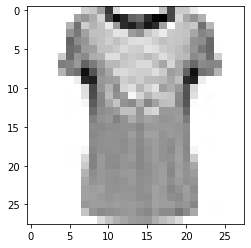

In [14]:
plt.imshow(X_train[1],cmap='binary')

In [15]:
myModel=models.Sequential([
        layers.Flatten(input_shape=[28,28]),
        layers.Dense(300,activation='relu'),
        layers.Dense(100,activation='relu'),
        layers.Dense(10,activation='softmax')
        
    ])

In [16]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
import pydot

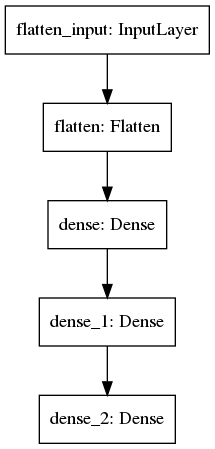

In [18]:
utils.plot_model(myModel)

In [19]:
myModel.layers

In [20]:
layar1=myModel.layers[1]

In [21]:
layar1.name

'dense'

In [22]:
import numpy as np

In [23]:
weights,biases=layar1.get_weights()

In [24]:
weights.shape

(784, 300)

In [25]:
type(weights)

numpy.ndarray

In [26]:
#optimizer=keras.optimizers.SGD(lr=???)
myModel.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [27]:
myTrainedModel=myModel.fit(X_train, y_train, epochs=5,
                         validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7159 - accuracy: 0.7667 - val_loss: 0.5057 - val_accuracy: 0.8336
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4892 - accuracy: 0.8292 - val_loss: 0.4444 - val_accuracy: 0.8532
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4442 - accuracy: 0.8456 - val_loss: 0.4142 - val_accuracy: 0.8610
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4180 - accuracy: 0.8541 - val_loss: 0.4106 - val_accuracy: 0.8622
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3992 - accuracy: 0.8605 - val_loss: 0.3863 - val_accuracy: 0.8656


In [28]:
import pandas as pd

In [29]:
myTrainedModel.history

{'loss': [0.7159215807914734,
  0.4892287254333496,
  0.4441947042942047,
  0.41795632243156433,
  0.3992203176021576],
 'accuracy': [0.7667272686958313,
  0.829200029373169,
  0.8456000089645386,
  0.8540727496147156,
  0.8605454564094543],
 'val_loss': [0.5057210326194763,
  0.4444337785243988,
  0.41422343254089355,
  0.4106205105781555,
  0.38632047176361084],
 'val_accuracy': [0.8335999846458435,
  0.8532000184059143,
  0.8610000014305115,
  0.8622000217437744,
  0.8655999898910522]}

In [30]:
pd.DataFrame(myTrainedModel.history)

,loss,accuracy,val_loss,val_accuracy
0,0.715922,0.766727,0.505721,0.8336
1,0.489229,0.829200,0.444434,0.8532
2,0.444195,0.845600,0.414223,0.8610
3,0.417956,0.854073,0.410621,0.8622
4,0.399220,0.860545,0.386320,0.8656


(0.2, 1.0)

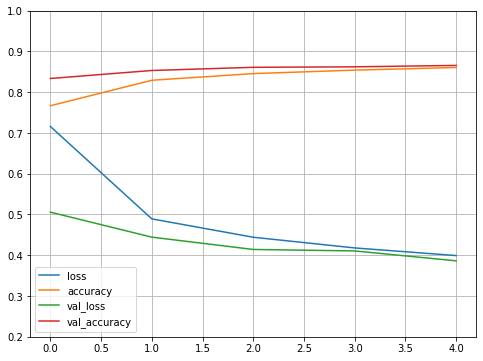

In [31]:
pd.DataFrame(myTrainedModel.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0.2, 1) # set the vertical range to [0-1]


In [32]:
X_test[8:10].shape

(2, 28, 28)

In [33]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [34]:
X_new=X_test[8:11]
y_proba = myModel.predict(X_new)
#y_proba.round(2)

In [38]:
y_pred = myModel.predict_classes(X_new);
y_pred

array([5, 7, 4])

In [39]:
y_new = y_test[8:11]
y_new

array([5, 7, 4], dtype=uint8)

Coat 4


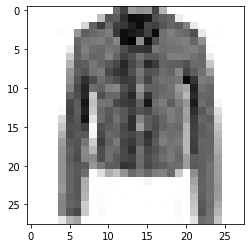

In [40]:
ntest=10
plt.imshow(X_test[ntest],cmap='binary')
print(class_names[y_test[ntest]],y_test[ntest])